# Predicting Flight Delays: Classification Models

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix


In [11]:
flights = pd.read_csv('../data/data-feature/flights-feature-edit-final.csv')

In [12]:
flights.rename(columns={'fl_date': 'date'}, inplace=True)

In [32]:
flights_df4 = flights[['month_arr_delay_avg', 'arr_delay', 'month_dep_delay_avg', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'dep_time_desc', 'arr_time_desc', 'plane_score',
       'orr_busy', 'arr_busy', 'route_mean_delay', 'route_median_delay',
       'route_lq_delay', 'route_uq_delay', 'route_prob_delay',
       'route_mean_dep_delay', 'route_lq_dep_delay', 'route_uq_dep_delay',
       'avg_incoming_delay_for_origin', 'avg_incoming_delay_for_dest',
       'avg_outgoing_delay_for_origin', 'avg_outgoing_delay_for_dest',
       'num_carr_flts', 'carr_del', 'gen_del', 'op_carr_abs_quality']]

In [15]:
def is_delay(delay):
    if delay <= 0:
        return 0
    else:
        return 1

In [33]:
flights_df4['is_delay'] = flights_df4['arr_delay'].map(is_delay)

In [34]:
flights_df4.columns

Index(['month_arr_delay_avg', 'arr_delay', 'month_dep_delay_avg', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'dep_time_desc', 'arr_time_desc',
       'plane_score', 'orr_busy', 'arr_busy', 'route_mean_delay',
       'route_median_delay', 'route_lq_delay', 'route_uq_delay',
       'route_prob_delay', 'route_mean_dep_delay', 'route_lq_dep_delay',
       'route_uq_dep_delay', 'avg_incoming_delay_for_origin',
       'avg_incoming_delay_for_dest', 'avg_outgoing_delay_for_origin',
       'avg_outgoing_delay_for_dest', 'num_carr_flts', 'carr_del', 'gen_del',
       'op_carr_abs_quality', 'is_delay'],
      dtype='object')

In [35]:
flights_df4.drop('arr_delay', axis=1, inplace=True)

In [115]:
#flights_df4 = flights_df4.sample(frac=1)[:100000]

In [36]:
X = flights_df4.drop('is_delay', axis=1)
y = flights_df4['is_delay']

In [19]:
'''
tail_num_le = LabelEncoder()
X['tail_num'] = tail_num_le.fit_transform(X['tail_num'])

airports_le = LabelEncoder()
X['origin'] = airports_le.fit_transform(X['origin'])
X['dest'] = airports_le.fit_transform(X['dest'])

op_carrier_le = LabelEncoder()
X['op_unique_carrier'] = op_carrier_le.fit_transform(X['op_unique_carrier'])
'''

"\ntail_num_le = LabelEncoder()\nX['tail_num'] = tail_num_le.fit_transform(X['tail_num'])\n\nairports_le = LabelEncoder()\nX['origin'] = airports_le.fit_transform(X['origin'])\nX['dest'] = airports_le.fit_transform(X['dest'])\n\nop_carrier_le = LabelEncoder()\nX['op_unique_carrier'] = op_carrier_le.fit_transform(X['op_unique_carrier'])\n"

In [37]:
dummies = pd.get_dummies(X[['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy']])
X = pd.concat([X, dummies], axis=1)

In [38]:
X.drop(['dep_time_desc', 'arr_time_desc', 'orr_busy', 'arr_busy'], axis=1, inplace=True)

In [39]:
X_transformed = X.to_numpy()

In [40]:
y_transformed = y.to_numpy().reshape(-1,1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, train_size=0.75)

In [25]:
#Gradient Boost 

gbc = GradientBoostingClassifier()

gbc.fit(X_train,y_train)

ValueError: could not convert string to float: 'noon'

In [122]:
gbc.score(X_test, y_test)

0.70996

In [123]:
y_pred_gbc = gbc.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80     16247
           1       0.65      0.37      0.47      8753

    accuracy                           0.71     25000
   macro avg       0.69      0.63      0.63     25000
weighted avg       0.70      0.71      0.68     25000



In [58]:
#XGB Classifier

In [42]:
xgb_c = xgb.XGBClassifier()

In [43]:
xgb_c.fit(X_train, y_train)

[17:19:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgb_c.score(X_test, y_test)

0.7069838614245201

In [45]:
y_pred_xgb = xgb_c.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80    159067
           1       0.64      0.39      0.48     85998

    accuracy                           0.71    245065
   macro avg       0.68      0.63      0.64    245065
weighted avg       0.69      0.71      0.69    245065



In [130]:
xgb_c.feature_importances_

array([0.02436872, 0.02240103, 0.0207277 , 0.02239834, 0.02136022,
       0.02524356, 0.02498706, 0.02401539, 0.04722809, 0.0211896 ,
       0.03515382, 0.02061112, 0.02946709, 0.02210673, 0.21302576,
       0.04769379, 0.23974611, 0.04675214, 0.02386436, 0.02196564,
       0.0206302 , 0.02506358], dtype=float32)

In [110]:
X.columns

Index(['op_unique_carrier', 'tail_num', 'origin', 'dest', 'crs_elapsed_time',
       'month', 'day', 'month_arr_delay_avg', 'is_weekend', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'plane_score', 'route_mean_delay',
       'route_median_delay', 'route_lq_delay', 'route_uq_delay',
       'route_prob_delay', 'route_mean_dep_delay', 'route_median_dep_delay',
       'route_lq_dep_delay', 'route_uq_dep_delay'],
      dtype='object')

In [51]:
def evaluate_binary_classification(model_name, y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = recall_score(y_test, y_pred)
    rocauc_score = roc_auc_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.tight_layout()
    plt.title(f'{model_name}', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return [accuracy, precision, recall, f1_score, rocauc_score]

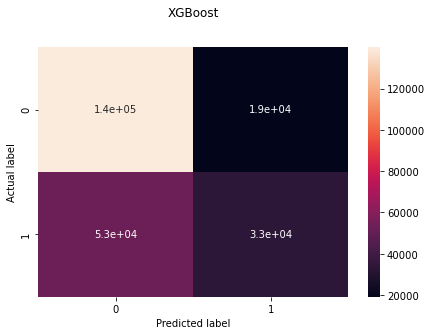

In [52]:
evaluation = evaluate_binary_classification('XGBoost', y_test, y_pred_xgb)